# Проект: А/В тест

Цель проекта:  
Необходимо проанализировать список гипотез от отдела маркетинга для увеличения выручки компании.  
Задачи:  
* Определить наиболее важные гипотезы методами ICE и RICE
* Запустить A/B-тест
* Проанализируйте результаты 
   
Описание данных:  
* Файл /datasets/hypothesis.csv содержит информацию о 9 гипотезах  
* Файлы /datasets/orders.csv и /datasets/visitors.csv содержат результаты А/Б тестирования </div>

## Часть. Приоритизация гипотез

### Проверка данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv(r'D:\Main\Yandex Practicum\Y.Anal\Project AB test\hypothesis.csv')

In [3]:
data.columns= data.columns.str.lower()
data.style.set_properties(**{'text-align': 'left'})

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Расчет ICE

In [4]:
data = pd.read_csv(r'D:\Main\Yandex Practicum\Y.Anal\Project AB test\hypothesis.csv')

data['ICE'] = round((data['Impact'] * data['Confidence'])/data['Efforts'], 2)

print(data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Расчет RICE

In [5]:
data['RICE'] = (data['Impact'] * data['Confidence'] * data['Reach'])/data['Efforts']

print(data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Вывод: Приоритет проверки гипотез различается в методах ICE и RICE, потому что в последнем дополнительно учитывается влияние фактора reach, оценивающего скольких пользователей затронет вносимое изменение. Наиболее приоритетные гипотезы по методу ICE: 8, 0, 7, 6, 2. По методу RICE: 7, 2, 0, 6, 8.

Наиболее приоритетной для проверки является гипотеза номер 7.  

* Проверяемое в ней событие окажет влияние на бОльшее число пользователей, чем события в других гипотезах поскольку гипотеза имеет наибольшее значение RICE.  
* Гипотеза 7 находится в топ 3 гипотез по методам ICE и RICE, что говорит о том, что она окажет большое влияние, которое вполне точно определено, и будет простой во внедрении</div>

## Часть. Анализ A/B-теста

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

#### Прочтём данные из файлов с результатами A/B-тестирования:

In [6]:
orders = pd.read_csv(r'D:\Main\Yandex Practicum\Y.Anal\Project AB test\orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
orders.duplicated().sum()

0

In [8]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [11]:
visitors = pd.read_csv(
    r'D:\Main\Yandex Practicum\Y.Anal\Project AB test\visitors.csv'
)
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
visitors.duplicated().sum()

0

In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Объединим таблицы

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


#### Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

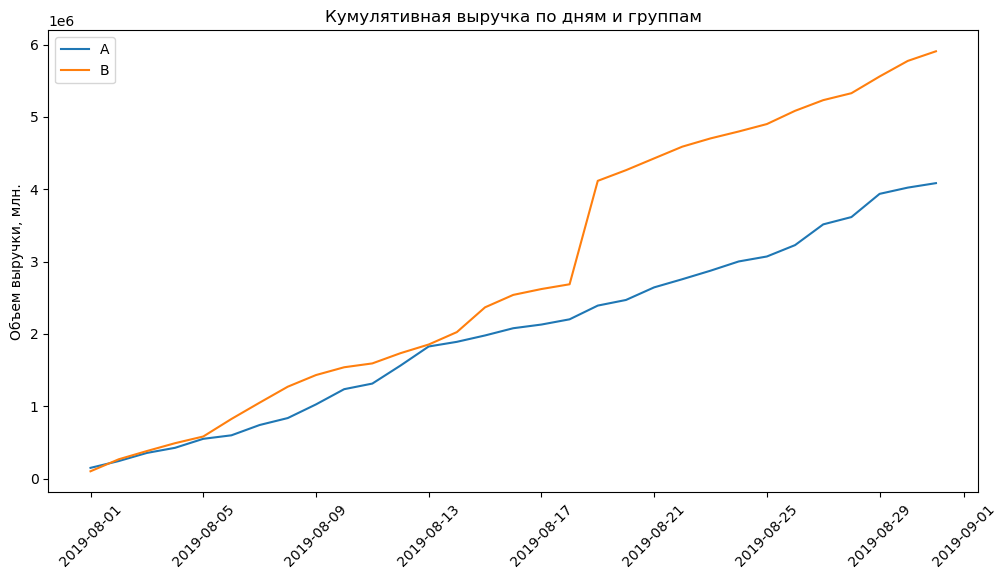

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по дням и группам')
plt.ylabel('Объем выручки, млн.');

Вывод: Выручка равномерно увеличивается в течение всего теста для группы B, в то время как выручка группы A резко увеличилась примерно в середине эксперимента. Это может сигнализировать о резком увеличении числа заказов, либо о появлении очень дорогих заказов в выборке в наблюдаемый период. 

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

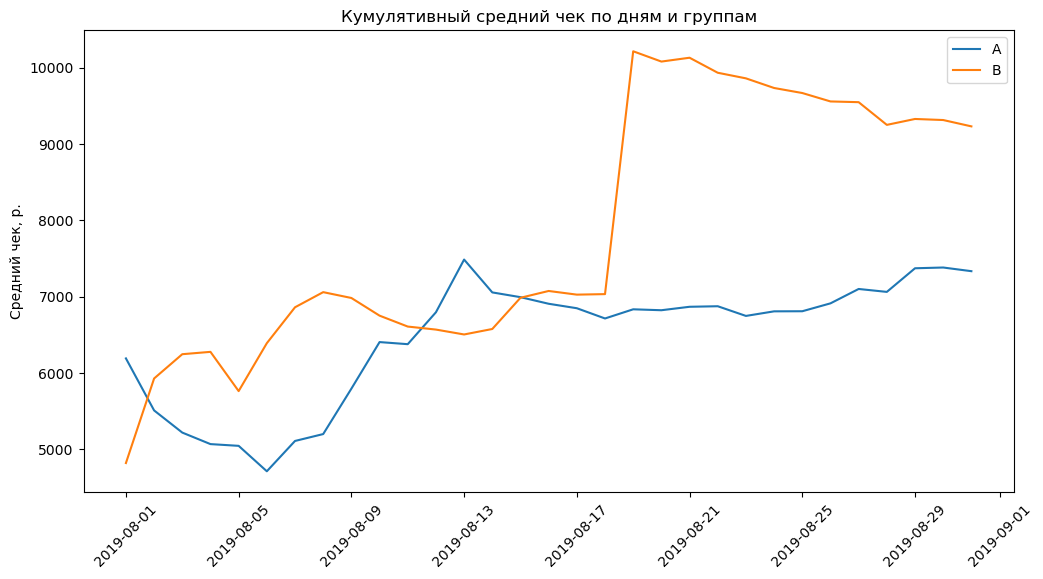

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по дням и группам')
plt.ylabel('Средний чек, р.');

Вывод: В группе А средний чек пришел к зоне 7-8k, но продолжает расти. В группе B средний чек подвержен волатильности: он одномоментно сильно вырос, после чего начал стабильно падать. Это может быть связано с большими заказами, после которых средний чек старается "выровняться"

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

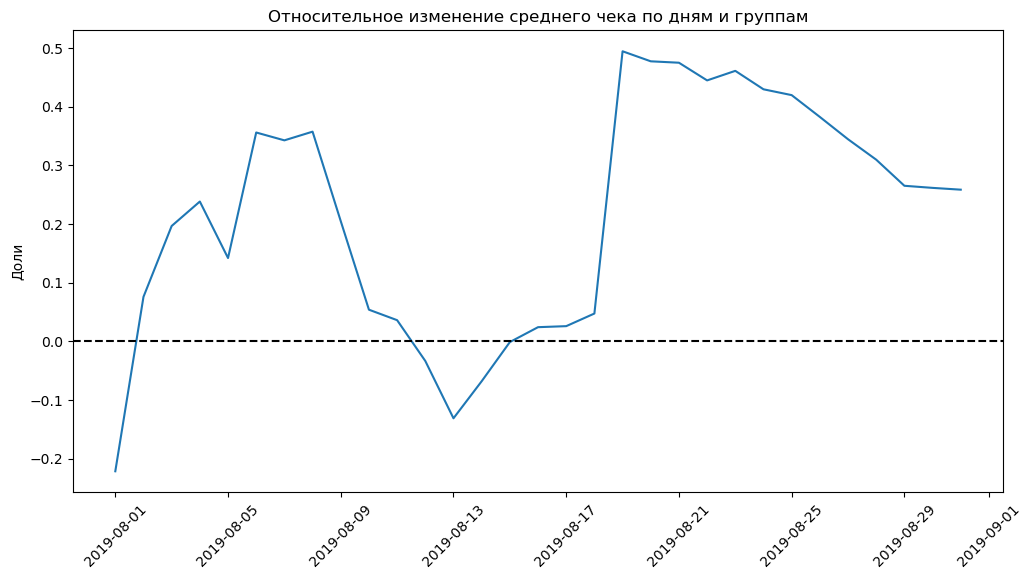

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Относительное изменение среднего чека по дням и группам')
plt.ylabel('Доли');

Вывод: Кумулятивный средний чек сильно отличается в двух группах. По резким скачкам графика можно догадаться о наличии больших заказов и (или) выбросов.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

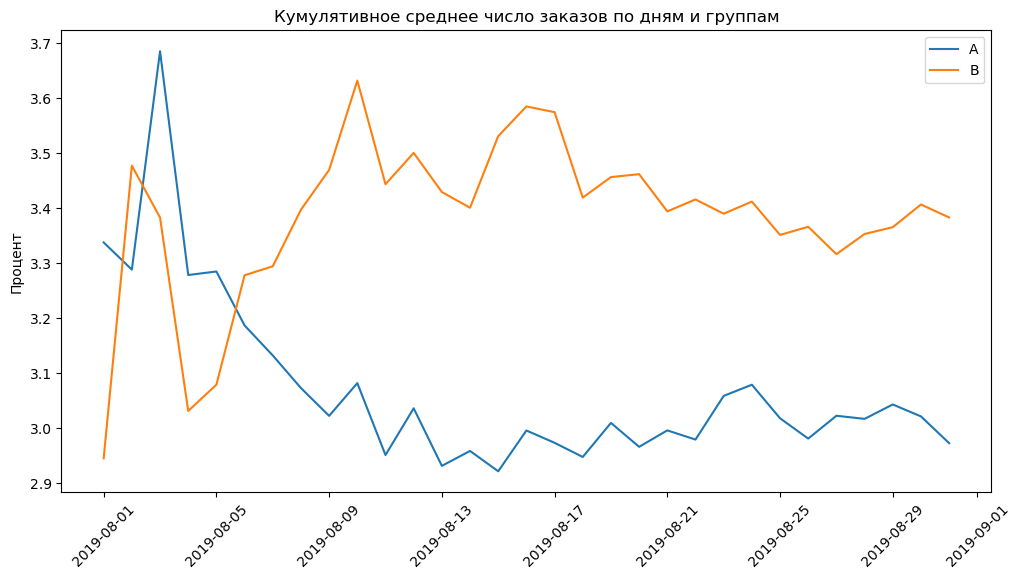

In [21]:
# считаем кумулятивное среднее число заказов
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']*100

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивное среднее число заказов по дням и группам')
plt.ylabel('Процент');

Вывод: Кумулятивное среднее число заказов в обеих группах зафиксировалось в узких диапазонах. Группа А около отметки в 3%, Группа B около 3.4%

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

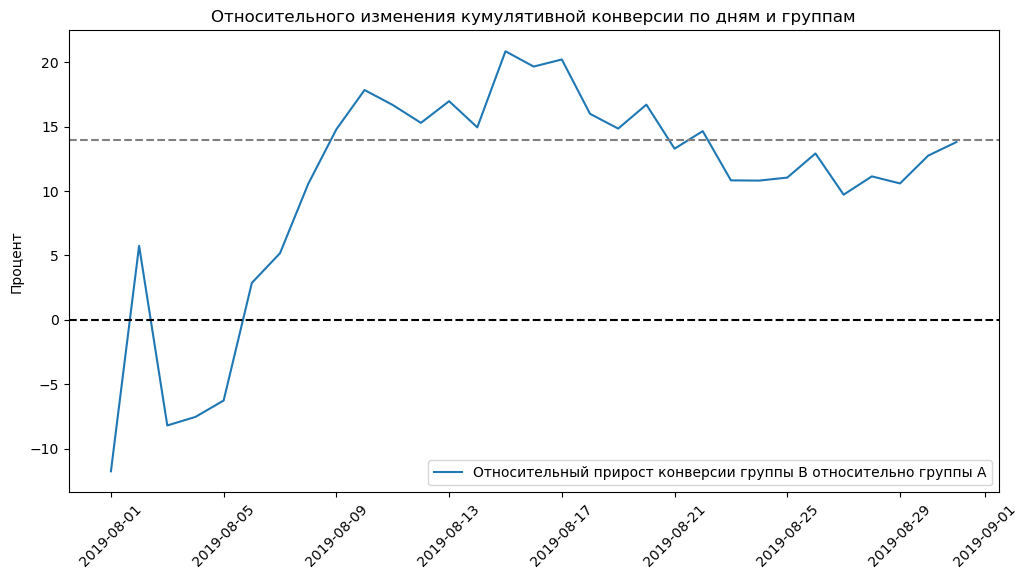

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)*100, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=14, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title('Относительного изменения кумулятивной конверсии по дням и группам')
plt.ylabel('Процент');

Вывод: кумулятивная конверсия группы B на данный момент на 14% выше чем у группы А. В группе B посетители чаще делают заказы (конвертируются в покупателей)

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [23]:
data = pd.read_csv(r'D:\Main\Yandex Practicum\Y.Anal\Project AB test\orders.csv')

ordersByUsers = (
    data.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['Id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

              Id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0, 0.5, 'Заказы, шт.')

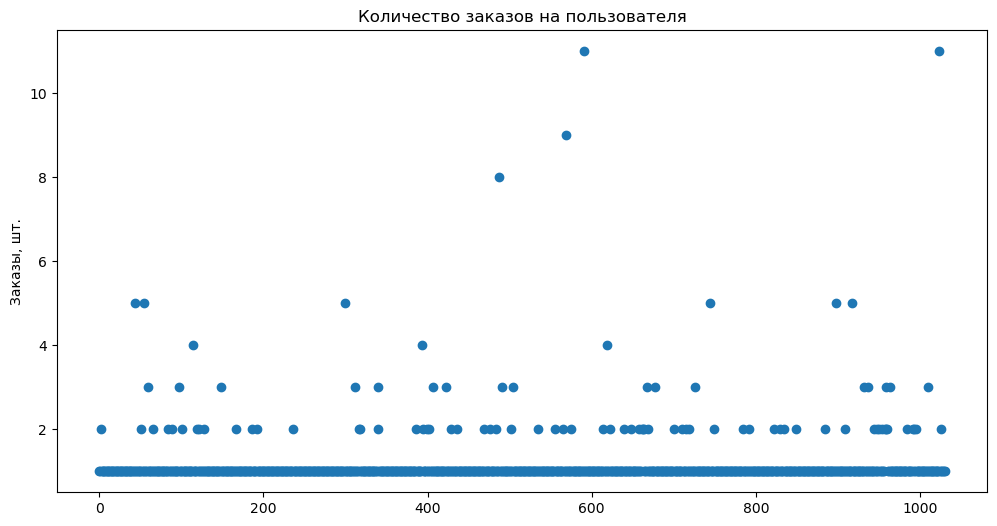

In [24]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов на пользователя')
plt.ylabel('Заказы, шт.')


Вывод: большинство покупателей делают от 2 до 3 заказов. Есть несколько покупателей с 4-5 заказами.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [25]:
ord_95 = np.percentile(ordersByUsers['orders'], 95)
ord_95

2.0

In [26]:
ord_99 = np.percentile(ordersByUsers['orders'], 99)
ord_99

4.0

Вывод: 5% покупателей совершают более 2 заказов и только 1% покупателей - более 4 заказов. Можно установить границу отсечения аномалий на уровне 4 заказа

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [27]:
data

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [28]:
data['revenue'].max()

1294500

Text(0, 0.5, 'Стоимость, млн.')

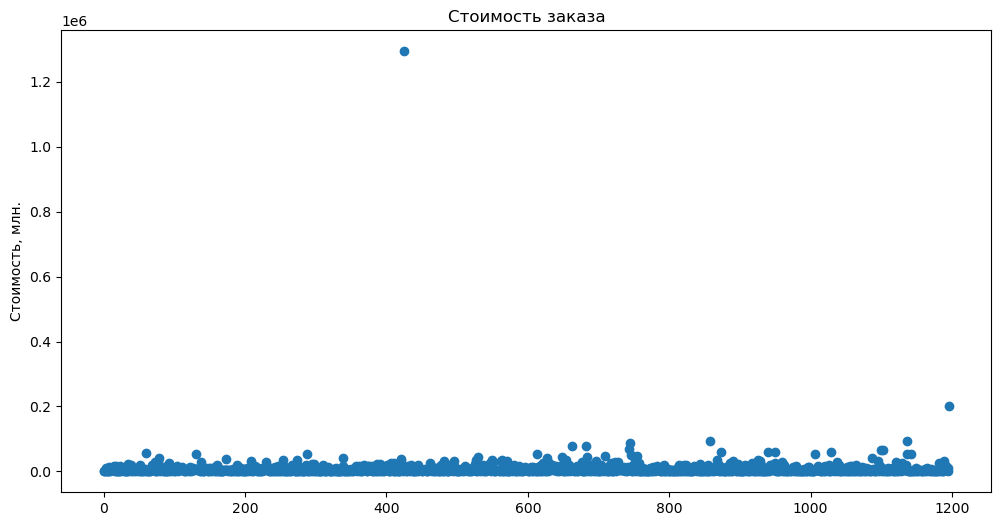

In [29]:
x_values = pd.Series(range(0,len(data['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, data['revenue'])
plt.title('Стоимость заказа')
plt.ylabel('Стоимость, млн.')

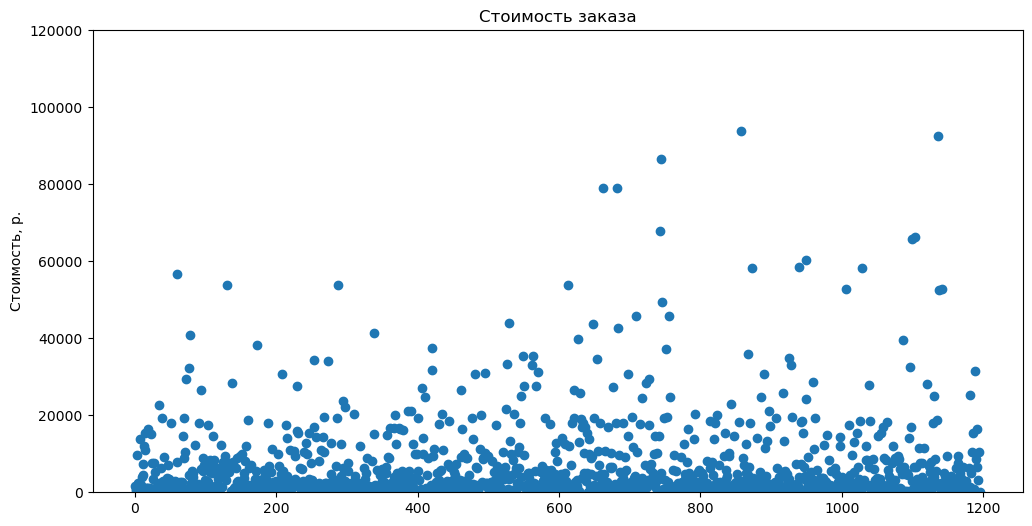

In [30]:
x_values = pd.Series(range(0,len(data['revenue'])))
plt.figure(figsize=(12, 6))
plt.ylim(ymax = 120000, ymin = 0)
plt.scatter(x_values, data['revenue'])
plt.title('Стоимость заказа')
plt.ylabel('Стоимость, р.');

Вывод: основную массу заказов составляют покупки до 100 000. Похоже была всего одна покупка на 200 к и одна на 1.29 млн.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [31]:
rev_95 = np.percentile(data['revenue'], 95)
rev_95

28000.000000000004

In [32]:
rev_99 = np.percentile(data['revenue'], 99)
rev_99

58233.19999999999

Вывод: 5% заказов стоит дороже 28 000, 1% заказов стоит дороже 58 233. Выберем границу аномальных значений в 1%

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [33]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [34]:
visitors.head(1)

,date,group,visitors
0,2019-08-01,A,719


In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Для установления статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным выдвинем гипотезы:  
Н0: статистически значимых различий в количестве заказов нет  
Н1: статистически значимые различия в количесте заказов есть  

Проверим гипотезу с помощью Непараметрического теста Уилкоксона-Манна-Уитни с уровнем значимости 95% (a=0.05).  
Использование данного теста обусловлено наличием больших выбросов </div>

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(f' p-value: {stats.mannwhitneyu(sampleA, sampleB)[1]}')

print(f'Отношение среднего числа заказов группы B к среднему чеку группы A: {sampleB.mean() / sampleA.mean() - 1}')

 p-value: 0.016792355056752608
Отношение среднего числа заказов группы B к среднему чеку группы A: 0.13807884655320146


Вывод: p-vale меньше 0.05 - Отвергаем нулевую гипотезу. Значит есть статистически значемые различия в среднем числе заказов по группам. В группе B среднее число заказов на покупателя почти на 14% больше. 

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Для установления статистической значимости различий в среднем чеке заказа между группами по «сырым» данным выдвинем гипотезы:  
Н0: статистически значимых различий в среднем чеке заказа нет  
Н1: статистически значимые различия в среднем чеке заказа есть  

Проверим гипотезу с помощью Непараметрического теста Уилкоксона-Манна-Уитни с уровнем значимости 95% (a=0.05).  
Использование данного теста обусловлено наличием больших выбросов </div>

In [37]:
print('p-value')
print(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print('Отношение среднего чека группы B к среднему чеку группы A')
print(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

p-value
0.7292909855432458
Отношение среднего чека группы B к среднему чеку группы A
0.2587136699126005


Вывод: p-value больше 0.05, поэтому мы не отвергаем нулевую гипотезу об отсутсвии статистически значимых отличий в среднем чеке между группами. Впрочем, средний чек группы B значительно выше среднего чека группы A, что можно объяснить случайностью.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [38]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ord_99]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > ord_99]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > rev_99]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
15


Оценим влияние этих 15 пользователей на результаты теста о среднем количестве заказов.

Для установления статистической значимости различий в среднем количестве заказов на посетителя по очищенным данным выдвинем гипотезы:  
Н0: статистически значимых различий в среднем количестве заказов нет  
Н1: статистически значимые различия в среднем количестве заказов есть  

Проверим гипотезу с помощью Непараметрического теста Уилкоксона-Манна-Уитни с уровнем значимости 95% (a=0.05).  
Использование данного теста обусловлено наличием больших выбросов </div>

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [40]:
print(f' p-value: {stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]}')
print(f' Отношение среднего числа заказов на посетителя в группе B к группе А: {sampleBFiltered.mean()/sampleAFiltered.mean()-1}')

 p-value: 0.014380135585307981
 Отношение среднего числа заказов на посетителя в группе B к группе А: 0.15331306791514754


Вывод: p-vale меньше 0.05 - Отвергаем нулевую гипотезу. результаты изменились несильно по сравнению с сырыми данными.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [43]:
print('p-value:')
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)



p-value:
0.851


In [46]:
print('Разница в среднем чеке между группами в процентах:')
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Разница в среднем чеке между группами в процентах:
-0.006


Вывод: данные поменялись очень сильно. Значит, на результаты теста оказывали очень сильное влияние аномально высокие чеки. 
Теперь вместо 25% разницы в среднем чеке двух групп мы наблюдаем разницу в 0.6%

### Примите решение по результатам теста и объясните его

Вывод. При одинаковом среднем чеке, в группе B на 14% больше заказов. Кумулятивная выручка и средний чек на неочищенных данных так же выше в группе B. Мы можем признать, что группа B имеет показатели лучше, чем группа А и остановить тест. 